<a href="https://colab.research.google.com/github/ravindrabharathi/Project1/blob/master/session19/Anchor_boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cluster bounding boxes using K-Means clustering and find the top 4 anchor box sizes 

### mount google drive and copy the vgg annotated file for face dataset images 

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
!ls '/gdrive/My Drive/EVA/session19'

faces.json


In [0]:
data_file='/gdrive/My Drive/EVA/session19/faces.json'

In [0]:
!cp '/gdrive/My Drive/EVA/session19/faces.json' './'

### import json lib for parsing json data

In [0]:
import json 

import os

with open('./faces.json') as f:
  faces_json=json.load(f)



### parse the via project settings file 'faces.json' and get the width and heigt of each region marked in the json 

In [7]:
faces_json.keys()

dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes'])

In [0]:
 faces_img=faces_json['_via_img_metadata']

In [0]:
img_list=[]
for img in faces_img:
  img_list.append(faces_img[img])

### get each width , height pair and add it to a list called bbox

In [0]:
width_list=[]
height_list=[]
bbox=[]

for img in img_list:
  for region in img['regions']:
    width_list.append(region['shape_attributes']['width'])
    height_list.append(region['shape_attributes']['height'])
    bbox.append([region['shape_attributes']['width'],region['shape_attributes']['height']])

### convert bbox to a numpy array

In [0]:

import numpy as np


bbox=np.array(bbox)

### import matplotlib for plotting the data and KMeans module from scikit learn for clustering 

In [0]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

### plot the data (width on x axis and height on y axis ) 

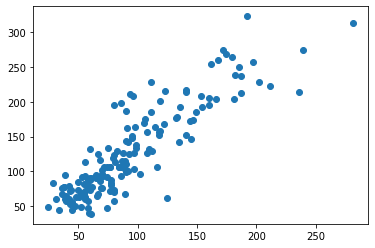

In [13]:
plt.scatter(bbox[:,0],bbox[:,1])
plt.show()

### run K-Means clustering on bbox and plot the 4 clusters and their centroids 

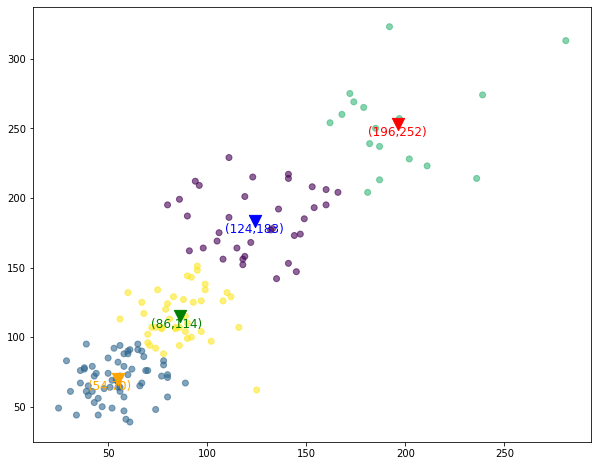

In [14]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=4,random_state=2019).fit(bbox)
centroids=km_model.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(bbox[:,0], bbox[:,1], c=km_model.labels_.astype(float),alpha=0.6)
plt.scatter(centroids[0,0],centroids[0,1],s=150,c='b', marker='v')
plt.text(centroids[0,0]-15,centroids[0,1]-8, '('+str(int(centroids[0,0]))+','+str(int(centroids[0,1]))+')', c='b',fontsize=12)

plt.scatter(centroids[1,0],centroids[1,1],s=150,c='orange', marker='v')
plt.text(centroids[1,0]-15,centroids[1,1]-8, '('+str(int(centroids[1,0]))+','+str(int(centroids[1,1]))+')',c='orange', fontsize=12)

plt.scatter(centroids[2,0],centroids[2,1],s=150,c='r', marker='v')
plt.text(centroids[2,0]-15,centroids[2,1]-8, '('+str(int(centroids[2,0]))+','+str(int(centroids[2,1]))+')',c='r', fontsize=12)

plt.scatter(centroids[3,0],centroids[3,1],s=150,c='g', marker='v')
plt.text(centroids[3,0]-15,centroids[3,1]-8, '('+str(int(centroids[3,0]))+','+str(int(centroids[3,1]))+')',c='g', fontsize=12)

plt.show()

### print the width and height corresponding to the centroids of the 4 clusters . These will be the 4 anchor box sizes.

In [15]:
for cx,cy in centroids:
  print(int(cx),',',int(cy))

124 , 183
54 , 70
196 , 252
86 , 114


### The four anchor box sizes found using KMeans clustering are (124 x 183) , (54 x 70) , (196 x 252) and (86 x 114)